In [ ]:
collab = 1

In [ ]:
if collab:
  from google.colab import drive
  drive.mount('/content/drive')

  %cd /content/drive/MyDrive/Projects/GO_GO_Nihongo

Mounted at /content/drive
/content/drive/MyDrive/Projects/GO_GO_Nihongo


In [ ]:
from IPython.display import clear_output

%pip install datasets
%pip install janome mojimoji
%pip install transformers
%pip install sentencepiece
%pip install tensorflow
clear_output()

In [ ]:
import pandas as pd

# df = pd.read_csv(
#     "hf://datasets/Verah/tatoeba_dedupe_en-jp_2024-March-01/tatoeba_dedupe_random_en-jp_2024-03-01.tsv.gz",
#     sep="\t",
# )
# df.to_csv("./datas/eng_jap_dataset.csv")
import pandas as pd

df_orginal = pd.read_csv("./datas/Aniki.csv", index_col=False)
# df = pd.read_csv("./datas/eng_jap_dataset.csv",index_col=False)
# first_run Uncomment the below line for the 1st run
# df=df[:2000]
df_orginal

,Unnamed: 0,english,japanese,_eng_len,_jpn_len
0,0,go.,行け 。,1,2
1,1,go.,行き なさい 。,1,3
2,2,hi.,こんにちは 。,1,2
3,3,hi.,もしもし 。,1,2
4,4,hi.,やっ ほ ー 。,1,4
...,...,...,...,...,...
109774,109774,the small crowd at hiroshima peace memorial pa...,アメリカ 軍用 機 エノラ・ゲイ から 「 リトル ボーイ 」 と 名付け られ た 原子 ...,34,44
109775,109775,"""i heard that tom and john are identical twins...",「 トム と ジョン って 一卵性双生児 と は 聞い て た けど 、 本当に よく 似 ...,41,50
109776,109776,"when i was younger, i hated going to weddings....",若い 頃 って さぁ 、 結婚式 に 行く の が 嫌 で 嫌 で たまらなかっ た わ 。...,44,86
109777,109777,if someone who does not know your background s...,生い立ち を 知ら ない 人 に ネイティブ みたい に 聞こえる よ って 言わ れ たら...,47,58


In [ ]:
upper_limit = 25
lower_limit = 6

df = df_orginal.copy()
total = len(df["japanese"])
print(f"Total: {total:,}")

outside_of_the_specified_limit = len(
    df.loc[
        df["japanese"].apply(
            lambda x: (len(str(x).split()) > upper_limit)
            or (len(str(x).split())) < lower_limit
        )
    ]
)
print(f"Outside of the specified limit: {outside_of_the_specified_limit:,}")

print(f"Percentage: {100 * outside_of_the_specified_limit/total:.2f}%")

df = df.drop(
    df.loc[
        df["japanese"].apply(
            lambda x: len(str(x).split()) > upper_limit
            or len(str(x).split()) < lower_limit
        )
    ].index
)


upper_limit = 25
lower_limit = 4
# df=df_orginal.copy()
total = len(df["english"])
print(f"Total: {total:,}")

outside_of_the_specified_limit = len(
    df.loc[
        df["english"].apply(
            lambda x: (len(str(x).split()) > upper_limit)
            or (len(str(x).split())) < lower_limit
        )
    ]
)
print(f"Outside of the specified limit: {outside_of_the_specified_limit:,}")

print(f"Percentage: {100 * outside_of_the_specified_limit/total:.2f}%")

df = df.drop(
    df.loc[
        df["english"].apply(
            lambda x: len(str(x).split()) > upper_limit
            or len(str(x).split()) < lower_limit
        )
    ].index
)

Total: 109,779
Outside of the specified limit: 10,507
Percentage: 9.57%
Total: 99,272
Outside of the specified limit: 3,557
Percentage: 3.58%


In [ ]:
# df=df[:5000]
df

,Unnamed: 0,english,japanese,_eng_len,_jpn_len
627,627,I am a boy.,僕 、 男 だ よ 。,4,6
690,690,it is a tv.,それ は テレビ だ よ 。,4,6
992,992,i am a boy.,僕 、 男 だ よ 。,4,6
1094,1094,I will do it.,私 が ちゃんと やり ます から 。,4,7
1097,1097,I will go in.,私 が 中 に 入る 。,4,6
...,...,...,...,...,...
109735,109735,"the cones of the jack pine, for example, do no...",例えば ジャック ・ パイン の 松かさ は 、 高温 により 影響 を 受ける まで は ...,24,24
109748,109748,one way to lower the number of errors in the t...,タトエバ・コーパス の 間違い を 減らす 一つ の 方法 は 、 母国 語 へ のみ 翻訳...,24,22
109752,109752,he and i have a near-telepathic understanding ...,彼 と は ツー と 言え ば カー の 仲 だ よ 。 以心伝心 の 仲 と でも 言っ ...,24,23
109760,109760,if you translate from your second language int...,外国 語 から 母語 へ と 翻訳 すれ ば 、 その 逆 より も 、 間違い を 犯す ...,25,25


### Removing Emojis

In [ ]:
import re
import pandas as pd
import tqdm


emoji_list_datas_path = "./datas//Emoji Sheets - Emoji Only.csv"
emoji_df = pd.read_csv(emoji_list_datas_path)

# Extract the emojis into a list
emoji_list = emoji_df["Emoji_List"].tolist()

# Start the pattern string
pattern = "["

# Append each code point to the pattern string, ensuring each one is 8 digits
for cp in emoji_list:
    pattern += f"\\U{cp[1:]:0>8}"

# Close the pattern string
pattern += "]"

# Compile the regular expression
emoji_pattern = re.compile(pattern, re.UNICODE)


# function to completely remove the emojis from the comments using re
def remove_emojis(text):
    if not isinstance(text, str):
        return text  # or return an empty string: return ''

    # Compile the regular expression
    emoji_pattern = re.compile(pattern, re.UNICODE)

    # Use the sub method to remove emojis
    text_no_emojis = emoji_pattern.sub(r"", text)
    return text_no_emojis

In [ ]:
from tqdm import tqdm

tqdm.pandas(desc="Removing emojis from English text")
df["english"] = df["english"].progress_apply(remove_emojis)

tqdm.pandas(desc="Removing emojis from Japanese text")
df["japanese"] = df["japanese"].progress_apply(remove_emojis)

Removing emojis from Japanese text: 100%|██████████| 95715/95715 [00:08<00:00, 11872.27it/s]


## b

In [ ]:
import mojimoji


def zen_to_han(text):
    return mojimoji.zen_to_han(text)

### Removing accented characters

In [ ]:
import unicodedata


# English might have accent like é but Japanese doesn't have any accent I just create different function to ascii for Japanese and English
# Removing accented characters
def english_unicode_to_ascii(text):
    return "".join(
        ascii_text
        for ascii_text in unicodedata.normalize("NFKD", text)
        .encode("ascii", "ignore")
        .decode("utf-8", "ignore")
    )


def japanese_unicode_to_ascii(text):
    return " ".join(ascii_text for ascii_text in unicodedata.normalize("NFKD", text))


japanese_unicode_to_ascii("こんにちは。 今日は"), english_unicode_to_ascii(
    "Hello world é "
)

('こ ん に ち は 。   今 日 は', 'Hello world e ')

## Remove all punctuation and special characters, keeping only the specified characters (a-z, A-Z, Kanji, Katakana, Hiragana)

In [ ]:
import re


def clean_text(text):
    # Define regex pattern for allowed characters (Latin letters and Japanese characters)
    allowed_pattern = r"[^a-zA-Z\u4E00-\u9FFF\u3040-\u30FF\s]"
    # Replace everything not in allowed pattern with a space
    cleaned_text = re.sub(allowed_pattern, " ", text)

    # Remove extra spaces
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()

    cleaned_text = cleaned_text.lower()

    return cleaned_text


# Example usage
text = "こんにちは、世界! This is an example sentence."
print(clean_text(text))

こんにちは 世界 this is an example sentence


In [ ]:
%pip install janome mojimoji
from janome.tokenizer import Tokenizer
import mojimoji

# Initialize Japanese tokenizer
tokenizer = Tokenizer()


def preprocess_japanese_text(text):

    # TODO: Uncomment the line below to convert Japanese text to ASCII characters PROBLEM: cause the problem in tokenization
    # text=japanese_unicode_to_ascii(text)

    # Convert full-width characters to half-width
    text = mojimoji.zen_to_han(text)

    text = clean_text(text)

    # Tokenize the text
    tokens = tokenizer.tokenize(text, wakati=True)

    # Join tokens with a space to preserve word boundaries for translation models
    preprocessed_text = " ".join(tokens)

    # Remove any unnecessary whitespace
    preprocessed_text = preprocessed_text.strip()

    return "1sos " + preprocessed_text + " eos1"


text = "猫と犬がけんかしている。"
processed_text = preprocess_japanese_text(text)
print(processed_text)

1sos 猫 と 犬 が けんか し て いる eos1


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer


def preprocess_english_text(text):

    # Normalize text (you need to define these functions)
    text = text.lower()  # Convert text to lowercase
    text = english_unicode_to_ascii(text)  # Placeholder for your normalization
    text = clean_text(text)  # Placeholder for your cleaning function

    # Add special tokens
    preprocessed_text = text

    return "1sos " + preprocessed_text + " eos1"


# Example usage
text = "Hello, how are you?"
token = preprocess_english_text(text)
token

'1sos hello how are you eos1'

In [ ]:
from tqdm import tqdm


tqdm.pandas(desc="Preprocessing English text")
df["english_preprocessed"] = df["english"].progress_apply(preprocess_english_text)


tqdm.pandas(desc="Preprocessing Japanese text")
df["japanese_preprocessed"] = df["japanese"].progress_apply(preprocess_japanese_text)

# df.to_csv("./datas/eng_jap_dataset_preprocessed.csv")

Preprocessing Japanese text: 100%|██████████| 95715/95715 [01:51<00:00, 862.19it/s]


# Old

In [ ]:
old = True

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (
    Dense,
    LSTM,
    Embedding,
    Dropout,
    Input,
    dot,
    Activation,
    Concatenate,
)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import optimizers
from tensorflow.keras import initializers, regularizers, constraints

from sklearn.model_selection import train_test_split


import mojimoji
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import io

import nltk
import unicodedata
import sentencepiece as spm

In [ ]:
df[["english_preprocessed", "japanese_preprocessed"]].head()

,english_preprocessed,japanese_preprocessed
627,1sos i am a boy eos1,1sos 僕 男 だ よ eos1
690,1sos it is a tv eos1,1sos それ は だ よ eos1
992,1sos i am a boy eos1,1sos 僕 男 だ よ eos1
1094,1sos i will do it eos1,1sos 私 が ちゃんと やり ます から eos1
1097,1sos i will go in eos1,1sos 私 が 中 に 入る eos1


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer


def tokenize(text):
    tokenizer = Tokenizer(
        oov_token="<OOV>",
    )
    tokenizer.fit_on_texts(text)
    tensor = tokenizer.texts_to_sequences(text)

    # # Print the word index (mapping of words to numbers)
    # print("Word to Number Mapping:")
    # for word, index in tokenizer.word_index.items():
    #     print(f"{word}: {index}")

    return tokenizer  # or return tensor if you need it

In [ ]:
tokenize(["Hello world é <start> 1eos", "こんにちは 世界 eos1"])

In [ ]:
eng_tokenizer = tokenize(df["english_preprocessed"])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

# French tokenizer
ja_tokenizer = tokenize(df["japanese_preprocessed"])
ja_vocab_size = len(ja_tokenizer.word_index) + 1

# Sequences
seq_eng = eng_tokenizer.texts_to_sequences(df["english_preprocessed"])
seq_ja = ja_tokenizer.texts_to_sequences(df["japanese_preprocessed"])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# English tokenizer
# config_B32_D0.3_E300_U128
# first_run ensure that the value printed below is never 0

# Configuration details
BATCH_SIZE = 32
embedding_dim = 300
units = 128
epoch = 20


# Padding
max_length = max([len(seq) for seq in seq_eng + seq_ja])
seq_eng_final = pad_sequences(seq_eng, maxlen=max_length, padding="post")
seq_ja_final = pad_sequences(seq_ja, maxlen=max_length, padding="post")

print(f"Total unique words in the input: {len(ja_tokenizer.word_index)}")
print(f"Total unique words in the target: {len(eng_tokenizer.word_index)}")

print("English vocab size:", eng_vocab_size)
print("Japanese vocab size:", ja_vocab_size)

print("Max index in English sequences:", np.max(seq_eng_final))
print("Max index in Japanese sequences:", np.max(seq_ja_final))

print(f"File_name: config_B{BATCH_SIZE}_E{embedding_dim}_U{units}")

Total unique words in the input: 14923
Total unique words in the target: 10944
English vocab size: 10945
Japanese vocab size: 14924
Max index in English sequences: 10944
Max index in Japanese sequences: 14923
File_name: config_B32_E300_U128


In [ ]:
from sklearn.model_selection import train_test_split

X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(
    seq_ja_final, seq_eng_final, test_size=0.2, shuffle=True, random_state=42
)
y_train_old = np.clip(y_train_old, 0, eng_vocab_size - 1)
y_test_old = np.clip(y_test_old, 0, eng_vocab_size - 1)
X_train_old.shape, X_test_old.shape, y_train_old.shape, y_test_old.shape

((76572, 27), (19143, 27), (76572, 27), (19143, 27))

In [ ]:
# from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, dot, Activation, Concatenate, Layer
# from tensorflow.keras.models import Model
# import tensorflow as tf

# class TanhLayer(Layer):
#     def __init__(self, **kwargs):
#         super(TanhLayer, self).__init__(**kwargs)

#     def call(self, inputs):
#         return tf.nn.tanh(inputs)

# def create_translation_model(vocab_size_enc, vocab_size_dec, embedding_dim, units, max_length):
#     # Encoder
#     encoder_inputs = Input(shape=(max_length,), name="encoder_inputs")
#     encoder_embedding = Embedding(input_dim=vocab_size_enc, output_dim=embedding_dim, name="embedding_layer_encoder")(encoder_inputs)
#     encoder_lstm_1 = LSTM(
#         units,
#         return_sequences=True,
#         recurrent_initializer="glorot_uniform",
#         name="encoder_lstm"
#     )
#     encoder_lstm = LSTM(
#         units,
#         return_sequences=True,
#         return_state=True,
#         recurrent_initializer="glorot_uniform",
#         name="encoder_lstm"
#     )
#     encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
#     encoder_states = [state_h, state_c]

#     # Decoder
#     decoder_inputs = Input(shape=(max_length,), name="decoder_inputs")
#     decoder_embedding = Embedding(input_dim=vocab_size_dec, output_dim=embedding_dim, name="embedding_layer_decoder")(decoder_inputs)
#     decoder_lstm = LSTM(
#         units,
#         return_sequences=True,
#         return_state=True,
#         recurrent_initializer="glorot_uniform",
#         name="decoder_lstm"
#     )
#     decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

#     # Attention mechanism
#     hidden_with_time_axis = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(state_h)
#     # Wrap tf.nn.tanh in a custom layer
#     score = Dense(1)(TanhLayer()(Dense(units)(encoder_outputs) + Dense(units)(hidden_with_time_axis)))
#     attention_weights = Activation('softmax', name="attention_weights")(score)

#     # Wrap tf.reduce_sum in a Lambda layer
#     context_vector = tf.keras.layers.Lambda(lambda x: tf.reduce_sum(x[0] * x[1], axis=1))([attention_weights, encoder_outputs])

#     # Combine context vector and decoder outputs
#     context_vector_expanded = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(context_vector)
#     context_vector_repeated = tf.keras.layers.RepeatVector(max_length)(context_vector)  # Repeat context vector
#     decoder_combined_context = Concatenate(axis=-1)([context_vector_repeated, decoder_outputs])
#     # decoder_combined_context = Concatenate(axis=-1)([context_vector_expanded, decoder_embedding])

#     # Decoder LSTM output processed through dense layers
#     dense_output = Dense(units, activation="tanh")(decoder_combined_context)
#     decoder_dense_output = Dense(vocab_size_dec, activation="softmax", name="output_dense_layer")(dense_output)

#     # Define the model
#     model = Model([encoder_inputs, decoder_inputs], decoder_dense_output)

#     # Compile the model
#     loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction='none')
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=loss_object)

#     return model

# model = create_translation_model(ja_vocab_size, eng_vocab_size, embedding_dim, units, max_length)

# # Training function
# def train_model(model, X_train, y_train, X_test, y_test, epochs=20, batch_size=64):
#     # Prepare decoder input data (teacher forcing)
#     decoder_input_data = tf.pad(y_train[:, :-1], paddings=[[0, 0], [1, 0]])
#     decoder_input_data_val = tf.pad(y_test[:, :-1], paddings=[[0, 0], [1, 0]])

#     # Callbacks
#     callbacks = [
#         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
#         tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2),
#     ]

#     # Train the model
#     history = model.fit(
#         [X_train, decoder_input_data], y_train,
#         batch_size=batch_size,
#         epochs=epochs,
#         validation_data=([X_test, decoder_input_data_val], y_test),
#         callbacks=callbacks,
#     )

#     model.save("translation_model.h5")
#     return history
# history = train_model(model,X_train_old, y_train_old, X_test_old, y_test_old, epochs=epoch, batch_size=BATCH_SIZE)

In [ ]:
# First, let's modify the model architecture
def create_translation_model(input_dim, output_dim, max_length, embedding_dim, units):
    # Encoder
    encoder_inputs = Input(shape=(max_length,))
    enc_emb = Embedding(input_dim, embedding_dim, mask_zero=True)(encoder_inputs)
    encoder_1 = LSTM(
        units,
        return_sequences=True,
        recurrent_initializer="glorot_uniform",
    )(enc_emb)
    encoder = LSTM(
        units,
        return_sequences=True,
        return_state=True,
        recurrent_initializer="glorot_uniform",
    )(encoder_1)
    encoder_outputs, state_h, state_c = encoder
    encoder_states = [state_h, state_c]

    # Decoder
    decoder_inputs = Input(shape=(max_length,))
    dec_emb = Embedding(output_dim, embedding_dim, mask_zero=True)(decoder_inputs)
    decoder_lstm = LSTM(units, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)

    # Add attention mechanism
    attention = dot([decoder_outputs, encoder_outputs], axes=[2, 2])
    attention = Activation("softmax")(attention)
    context = dot([attention, encoder_outputs], axes=[2, 1])
    decoder_combined_context = Concatenate(axis=-1)([context, decoder_outputs])

    # Output
    output = Dense(embedding_dim, activation="tanh")(decoder_combined_context)
    output = Dense(output_dim, activation="softmax")(output)

    # Define model
    model = Model([encoder_inputs, decoder_inputs], output)


    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')
    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=loss_object,
        # metrics=[masked_accuracy],
    )

    return model


# Create and train the model
model = create_translation_model(
    input_dim=ja_vocab_size,
    output_dim=eng_vocab_size,
    max_length=max_length,
    embedding_dim=embedding_dim,
    units=units,
)


# # Training code
# def train_model(epochs=20, batch_size=64):
#     # Prepare decoder input data (teacher forcing)
#     decoder_input_data = np.zeros_like(X_train_old)
#     decoder_input_data[:, 1:] = y_train_old[:, :-1]
#     decoder_input_data[:, 0] = eng_tokenizer.word_index["1sos"]

#     # Validation decoder input
#     decoder_input_data_val = np.zeros_like(X_test_old)
#     decoder_input_data_val[:, 1:] = y_test_old[:, :-1]
#     decoder_input_data_val[:, 0] = eng_tokenizer.word_index["1sos"]

#     # Callbacks
#     callbacks = [
#         tf.keras.callbacks.EarlyStopping(
#             monitor="val_loss", patience=3, restore_best_weights=True
#         ),
#         tf.keras.callbacks.ReduceLROnPlateau(
#             monitor="val_loss", factor=0.5, patience=2
#         ),
#     ]

#     # Train
#     history = model.fit(
#         [X_train_old, decoder_input_data],
#         y_train_old,
#         batch_size=batch_size,
#         epochs=epochs,
#         # metrics=[masked_accuracy],
#         validation_data=([X_test_old, decoder_input_data_val], y_test_old),
#         callbacks=callbacks,
#     )
#     model.save("improved_translation_model.keras")

#     return history


# # Train the model
# history = train_model(epochs=epoch, batch_size=BATCH_SIZE)


def train_model_custom(epochs=20, batch_size=64):
    # Prepare decoder input data (teacher forcing)
    decoder_input_data = np.zeros_like(X_train_old)
    decoder_input_data[:, 1:] = y_train_old[:, :-1]
    decoder_input_data[:, 0] = eng_tokenizer.word_index["1sos"]

    # Validation decoder input
    decoder_input_data_val = np.zeros_like(X_test_old)
    decoder_input_data_val[:, 1:] = y_test_old[:, :-1]
    decoder_input_data_val[:, 0] = eng_tokenizer.word_index["1sos"]

    # Prepare the dataset
    train_dataset = tf.data.Dataset.from_tensor_slices(
        ((X_train_old, decoder_input_data), y_train_old)
    ).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices(
        ((X_test_old, decoder_input_data_val), y_test_old)
    ).batch(batch_size)

    # Define optimizer and metrics
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction="none")

    train_loss = tf.keras.metrics.Mean(name="train_loss")
    val_loss = tf.keras.metrics.Mean(name="val_loss")

    # Training loop
    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1}/{epochs}")
        train_loss.reset_state()
        val_loss.reset_state()

        # Training step
        for (batch, ((encoder_input, decoder_input), target)) in enumerate(train_dataset):
            with tf.GradientTape() as tape:
                # Forward pass
                decoder_output = model([encoder_input, decoder_input], training=True)
                batch_loss = tf.reduce_mean(
                    loss_object(target, decoder_output)
                )

            # Backpropagation
            gradients = tape.gradient(batch_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            train_loss.update_state(batch_loss)

            if batch % 100 == 0:
                print(f"  Batch {batch}, Loss: {train_loss.result().numpy():.4f}")

        # Validation step
        for (batch, ((encoder_input_val, decoder_input_val), target_val)) in enumerate(val_dataset):
            val_output = model([encoder_input_val, decoder_input_val], training=False)
            batch_val_loss = tf.reduce_mean(
                loss_object(target_val, val_output)
            )
            val_loss.update_state(batch_val_loss)

        # Epoch summary
        print(f"Epoch {epoch + 1}, Train Loss: {train_loss.result().numpy():.4f}, Val Loss: {val_loss.result().numpy():.4f}")

        # Save the model at each epoch
        model.save("improved_translation_model.keras")

    return model

# Train the model using the custom training loop
# history = train_model_custom(epochs=epoch, batch_size=BATCH_SIZE)
history = train_model_custom(epochs=1, batch_size=BATCH_SIZE)




Epoch 1/1


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


  Batch 0, Loss: 9.3038
  Batch 100, Loss: 2.8000
  Batch 200, Loss: 2.2436
  Batch 300, Loss: 2.0324
  Batch 400, Loss: 1.9174
  Batch 500, Loss: 1.8353
  Batch 600, Loss: 1.7781
  Batch 700, Loss: 1.7316
  Batch 800, Loss: 1.6909
  Batch 900, Loss: 1.6540
  Batch 1000, Loss: 1.6222
  Batch 1100, Loss: 1.5960
  Batch 1200, Loss: 1.5714
  Batch 1300, Loss: 1.5483
  Batch 1400, Loss: 1.5268
  Batch 1500, Loss: 1.5072
  Batch 1600, Loss: 1.4896
  Batch 1700, Loss: 1.4729
  Batch 1800, Loss: 1.4566
  Batch 1900, Loss: 1.4411
  Batch 2000, Loss: 1.4256
  Batch 2100, Loss: 1.4121
  Batch 2200, Loss: 1.3977
  Batch 2300, Loss: 1.3849
Epoch 1, Train Loss: 1.3733, Val Loss: 1.0763


AttributeError: 'Functional' object has no attribute 'history'

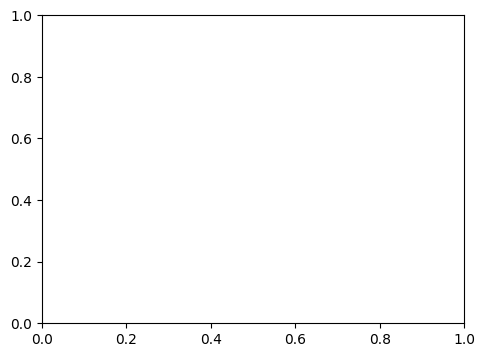

In [ ]:
import matplotlib.pyplot as plt

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf

model_loaded = load_model("improved_translation_model.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 32 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
model_used_for_prediction=history

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 27)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, 27, 300)        │      4,477,200 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_8 (NotEqual)    │ (None, 27)             │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_7             │ (None, 27)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_9 (LSTM)             │ (None, 27, 128)        │        219,648 │ embedding_6[0][0],     │
│                           │                        │                │ not_equal_8[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, 27, 300)        │      3,283,500 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_10 (LSTM)            │ [(None, 27, 128),      │        131,584 │ lstm_9[0][0],          │
│                           │ (None, 128), (None,    │                │ not_equal_8[0][0]      │
│                           │ 128)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_11 (LSTM)            │ [(None, 27, 128),      │        219,648 │ embedding_7[0][0],     │
│                           │ (None, 128), (None,    │                │ lstm_10[0][1],         │
│                           │ 128)]                  │                │ lstm_10[0][2]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot_6 (Dot)               │ (None, 27, 27)         │              0 │ lstm_11[0][0],         │
│                           │                        │                │ lstm_10[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 27, 27)         │              0 │ dot_6[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot_7 (Dot)               │ (None, 27, 128)        │              0 │ activation_3[0][0],    │
│                           │                        │                │ lstm_10[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_7             │ (None, 27, 256)        │              0 │ dot_7[0][0],           │
│ (Concatenate)             │                        │                │ lstm_11[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 27, 300)        │         77,100 │ concatenate_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 27, 10945)      │      3,294,445 │ dense_6[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 11,703,125 (44.64 MB)

 Trainable params: 11,703,125 (44.64 MB)

 Non-trainable params: 0 (0.00 B)

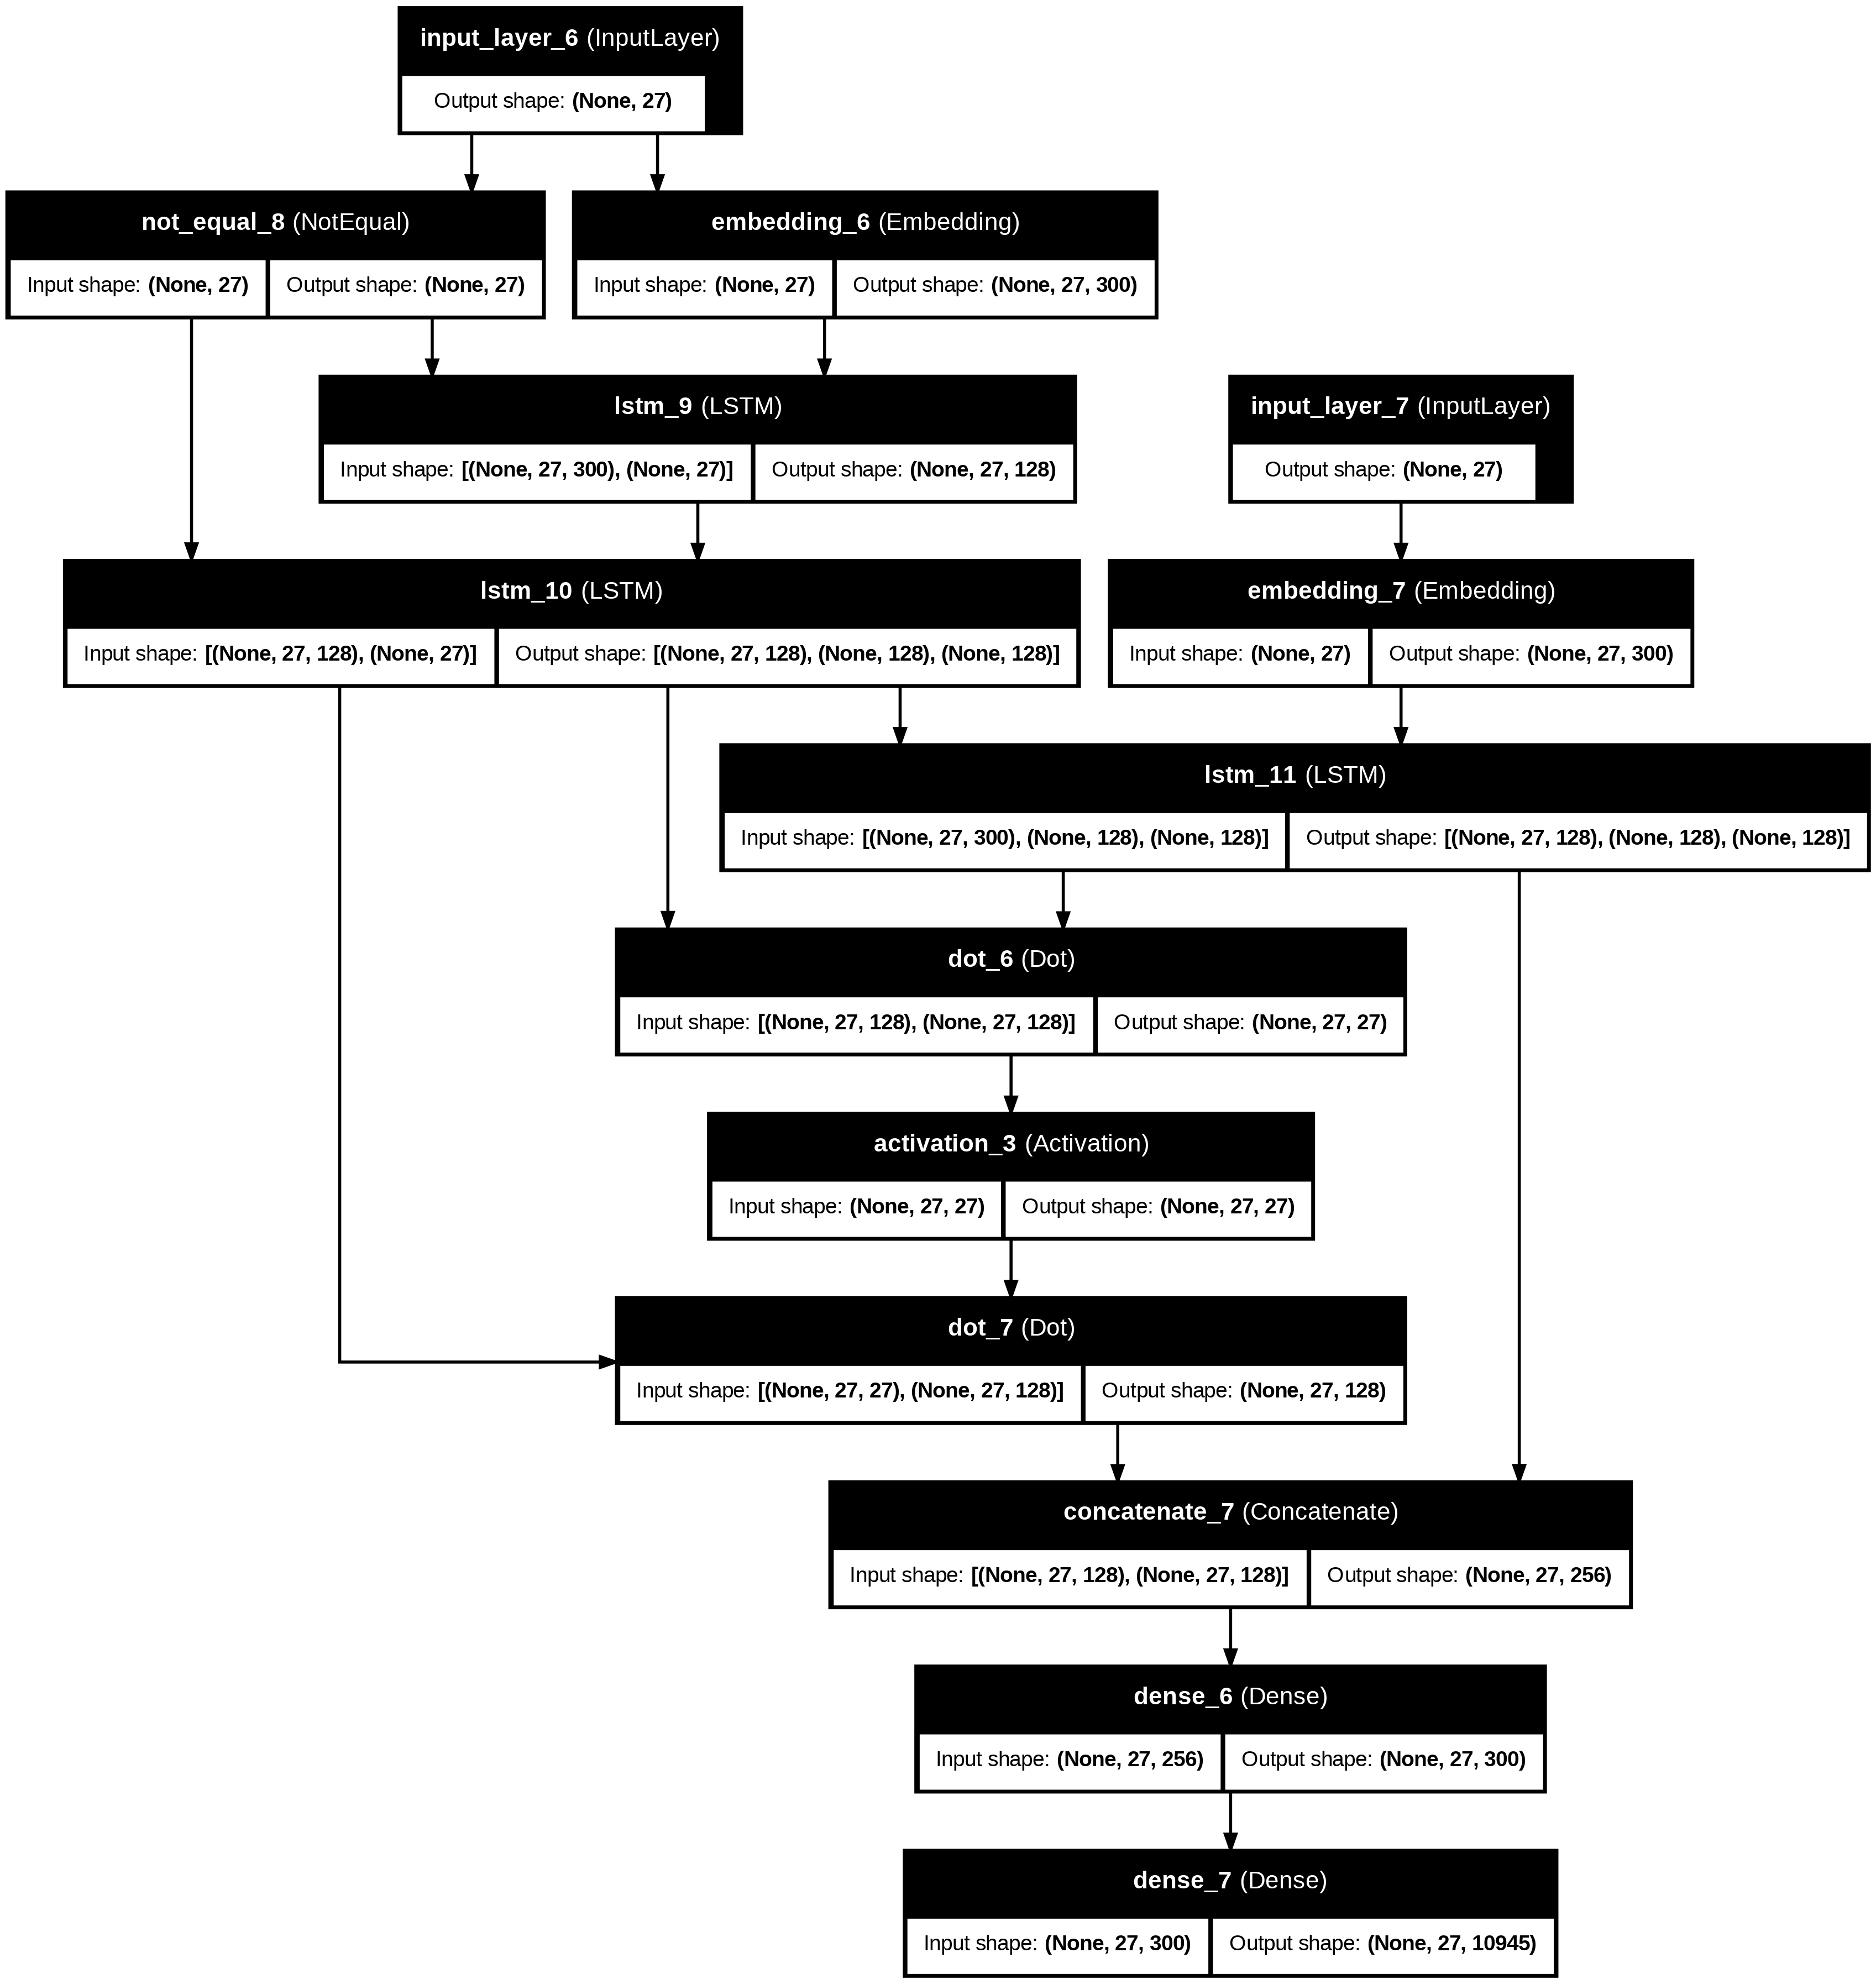

In [ ]:
from tensorflow.keras.utils import plot_model

# Generate a model summary
model_used_for_prediction.summary()

# Generate and save the model plot
plot_model(model_used_for_prediction, to_file="seq2seq_model.png", show_shapes=True, show_layer_names=True, expand_nested=True)

In [ ]:
# Modified prediction function
def predict(sentence,model, temperature=0.7):
    """
    Predict translation with temperature sampling for better results
    """
    # Preprocess input
    preprocessed = preprocess_japanese_text(sentence)
    input_seq = ja_tokenizer.texts_to_sequences([preprocessed])
    input_seq = pad_sequences(input_seq, maxlen=max_length, padding="post")

    # Initialize decoder input
    decoder_sequence = [eng_tokenizer.word_index["1sos"]]

    # Generate translation
    for i in range(max_length - 1):
        decoder_input = pad_sequences(
            [decoder_sequence], maxlen=max_length, padding="post"
        )

        # Get predictions
        predictions = model.predict([input_seq, decoder_input], verbose=0)

        # Apply temperature sampling
        predictions = np.log(predictions[0, i]) / temperature
        exp_preds = np.exp(predictions)
        predictions = exp_preds / np.sum(exp_preds)

        # Sample from the predictions
        next_token_idx = np.random.choice(len(predictions), p=predictions)

        # Stop conditions
        if next_token_idx == 0 or next_token_idx == eng_tokenizer.word_index.get(
            "eos1", 0
        ):
            break

        decoder_sequence.append(next_token_idx)

    # Convert to words
    predicted_text = []
    for idx in decoder_sequence:
        if idx in eng_tokenizer.index_word:
            word = eng_tokenizer.index_word[idx]
            if word not in ["1sos", "eos1", "<pad>"]:
                predicted_text.append(word)

    return " ".join(predicted_text)

In [ ]:
# Test translations
test_sentences = [
    "おはようございます。",  # good morning.
    "こんにちは、元気ですか？", # Hello, how are you?
    "私は日本語を勉強しています。",# I'm studying Japanese.
    "やっほー。", #Yahoo. ”
]

for sentence in test_sentences:
    translation = predict(sentence,model_used_for_prediction)
    print(f"\nJapanese: {sentence}")
    print(f"Translation: {translation}")


Japanese: おはようございます。
Translation: i have to buy the food

Japanese: こんにちは、元気ですか？
Translation: is your favorite handle

Japanese: 私は日本語を勉強しています。
Translation: i have already received a car

Japanese: やっほー。
Translation: i have like a favor


In [ ]:
from nltk.translate.bleu_score import sentence_bleu
from tqdm import tqdm

df_train = df.copy()[:10]
tqdm.pandas(desc="Translating Japanese text")  # Initialize tqdm for pandas
df_train["translated_test"] = df_train["japanese"].progress_apply(
    lambda x: predict(x,model_used_for_prediction)
)  # Apply with progress bar
df_train


Translating Japanese text: 100%|██████████| 10/10 [00:03<00:00,  2.56it/s]


,Unnamed: 0,english,japanese,_eng_len,_jpn_len,english_preprocessed,japanese_preprocessed,translated_test
627,627,I am a boy.,僕 、 男 だ よ 。,4,6,1sos i am a boy eos1,1sos 僕 男 だ よ eos1,i am not a diet
690,690,it is a tv.,それ は テレビ だ よ 。,4,6,1sos it is a tv eos1,1sos それ は だ よ eos1,that is a lot of people
992,992,i am a boy.,僕 、 男 だ よ 。,4,6,1sos i am a boy eos1,1sos 僕 男 だ よ eos1,you are a little genius
1094,1094,I will do it.,私 が ちゃんと やり ます から 。,4,7,1sos i will do it eos1,1sos 私 が ちゃんと やり ます から eos1,i am getting doing that
1097,1097,I will go in.,私 が 中 に 入る 。,4,6,1sos i will go in eos1,1sos 私 が 中 に 入る eos1,i am a great person
1098,1098,I am now.,私 は 今 歳 です 。,4,7,1sos i am now eos1,1sos 私 は 今 歳 です eos1,i have been twelve hours
1130,1130,I am not in.,私 は 関与 し て い ない 。,4,8,1sos i am not in eos1,1sos 私 は 関与 し て い ない eos1,i cannot become a new license
1142,1142,I am so fat.,僕 は すごく 太っ てる 。,4,6,1sos i am so fat eos1,1sos 僕 は すごく 太っ てる eos1,your house is a little mood
1177,1177,it is my cd.,俺 の ＣＤ じゃ ねえ か 。,4,7,1sos it is my cd eos1,1sos 俺 の cd じゃ ねえ か eos1,is your favorite shoes
1178,1178,it is on me.,僕 の おごり です よ 。,4,6,1sos it is on me eos1,1sos 僕 の おごり です よ eos1,the sound of us


In [ ]:
limit = 60
reference = [ref.split(" ") for ref in df_train["english"]][:limit]
jap_reference = [ref.split(" ")[1:-1] for ref in df_train["japanese"]][:limit]
hypothesis = [ref.split(" ") for ref in df_train["translated_test"]][:limit]

reference[0], jap_reference[0], hypothesis[0]

(['I', 'am', 'a', 'boy.'],
 ['、', '男', 'だ', 'よ'],
 ['i', 'am', 'not', 'a', 'diet'])

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

score = 0
smoothie = SmoothingFunction().method2
for i in range(len(reference)):
    score += sentence_bleu(reference[i], hypothesis[i], smoothing_function=smoothie)

score /= len(reference)
print("The bleu score is: " + str(score))

The bleu score is: 0.15767968454161346


In [ ]:
def create_reference(lang, tensor):
    all_sentence_list = []

    for word_list in tensor:
        sentence_list = []

        for t in word_list:
            if not t == 0:
                # Index number assigned to each word
                sentence_list.append(lang.index_word[t])
        all_sentence_list.append(sentence_list)
    return all_sentence_list

In [ ]:
limit = 60
reference = [
    ref[1:-1] for ref in create_reference(eng_tokenizer, y_test_old.tolist()[:limit])
]
jap_reference = [
    ref[1:-1] for ref in create_reference(ja_tokenizer, X_test_old.tolist()[:limit])
]
hypothesis = [
    predict(" ".join(ref),model_used_for_prediction).split(" ")
    for ref in tqdm(reference, desc="Generating hypotheses")  # Add tqdm here
]


# Create a list to store the data for the DataFrame
data = []
for ref, jap_ref, hyp in zip(reference, jap_reference, hypothesis):
    data.append({"Reference": ref, "Jap_reference": jap_ref, "Hypothesis": hyp})

# Create the DataFrame
df_results = pd.DataFrame(data)

# Display the DataFrame
df_results


Generating hypotheses: 100%|██████████| 60/60 [00:38<00:00,  1.57it/s]


,Reference,Jap_reference,Hypothesis
0,"[they, stood, up, simultaneously]","[彼ら, は, 一斉, に, 立ち上がっ, た]","[this, is, a, dentist, s, thing]"
1,"[i, have, not, eaten, anything, for, the, past...","[私, は, この, 日間, なに, も, 食べ, て, い, ない]","[it, is, a, picture, of, the, immigrants, you,..."
2,"[you, cannot, always, win]","[いつも, いつも, 勝て, やし, ない, よ]","[let, us, go, to, bed]"
3,"[she, exploded, with, laughter]","[彼女, は, おかしく, て, 吹き出し, て, しまっ, た]","[i, am, sorry, i, have, got, a, little, bit, s..."
4,"[do, you, remember, where, we, parked]","[どこ, に, 駐車, し, た, か, 覚え, て, い, ます, か]","[i, will, help, up, with, the, invitation]"
5,"[i, have, not, read, war, and, peace, either]","[僕, も, 戦争, と, 平和, は, 読ん, で, ませ, ん]","[if, you, find, a, new, grandmother, can, take..."
6,"[where, else, would, you, like, to, go]","[他, に, どこ, へ, 行き, たい, です, か]","[i, am, tired, of, a, lot, i, am, mild, the, d..."
7,"[i, do, not, object, to, your, plan]","[に, 異存, は, あり, ませ, ん]","[this, opinion, is, cracking, a, long, man]"
8,"[the, training, session, is, scheduled, to, be...","[研修, 会, は, 午後, 時, 開始, 予定, です]","[the, task, has, decided, to, go, abroad]"
9,"[there, was, a, lot, of, snow, last, winter]","[去年, の, 冬, は, 雪, が, たくさん, 降っ, た]","[there, is, my, mother, s, leg, to, look, in, ..."


In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

score = 0
smoothie = SmoothingFunction().method2
for i in range(len(reference)):
    score += sentence_bleu(reference[i], hypothesis[i], smoothing_function=smoothie)

score /= len(reference)
print("The bleu score is: " + str(score))

The bleu score is: 0.09376775361799596


In [ ]:
processed_references = [" ".join(ref) for ref in reference]
processed_jap_references = [" ".join(ref) for ref in jap_reference]
processed_hypothesis = [" ".join(ref) for ref in hypothesis]

# Create DataFrame
df_test = pd.DataFrame(
    {
        "Jap_reference": processed_jap_references,
        "Hypothesis": processed_hypothesis,
        "Reference": processed_references,
    }
)

# Display the DataFrame
df_test

,Jap_reference,Hypothesis,Reference
0,彼ら は 一斉 に 立ち上がっ た,i am sorry,they stood up simultaneously
1,私 は この 日間 なに も 食べ て い ない,my mother got to the stranger and i grow into ...,i have not eaten anything for the past three days
2,いつも いつも 勝て やし ない よ,i will put an egg,you cannot always win
3,彼女 は おかしく て 吹き出し て しまっ た,we will be sure to have the job,she exploded with laughter
4,どこ に 駐車 し た か 覚え て い ます か,fasten all people please come,do you remember where we parked
5,僕 も 戦争 と 平和 は 読ん で ませ ん,my father plays the glass of your name with th...,i have not read war and peace either
6,他 に どこ へ 行き たい です か,i have already homework at my homework,where else would you like to go
7,に 異存 は あり ませ ん,we can take a lot of rice,i do not object to your plan
8,研修 会 は 午後 時 開始 予定 です,this real will be back to us,the training session is scheduled to begin at p m
9,去年 の 冬 は 雪 が たくさん 降っ た,the bat who i have was allowed,there was a lot of snow last winter


# New


In [ ]:
# old=False

In [ ]:
# import tensorflow as tf

# def tokenize(lang):
#     # vectorize a text corpus
#     lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(
#         filters=' ')

#     # updates internal vocabulary based on a list of texts
#     # e.g. "[this place is good ]"→{this:2, place:3, is:1, good:4} "
#     lang_tokenizer.fit_on_texts(lang)

#     # Transforms each text in texts to a sequence of integers.
#     # e.g. this place is good → [[2, 3, 1, 4]]
#     tensor = lang_tokenizer.texts_to_sequences(lang)

#     # transform a list of num sample into a 2D Numpy array of shape
#     # Fixed length because length of sequence of integers are different
#     # return (len(sequences), maxlen)
#     tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
#                                                           padding='post')
#     return tensor, lang_tokenizer

In [ ]:
# # e.g.
# tokenize(['this place is good', "こんにちは 今日は いい天気 。", "today is so cold"])

In [ ]:
# # cleate a clean dataset
# def create_dataset( ja,en):

#     # input_tensor, target_tensor: 2d numpy array
#     # input_lang_tokenize, target_lang_tokenize: word dictionary
#     input_tensor, input_lang_tokenize = tokenize(ja)
#     target_tensor, target_lang_tokenize = tokenize(en)

#     return input_tensor, target_tensor, input_lang_tokenize, target_lang_tokenize

In [ ]:
# input_tensor, target_tensor, input_lang_tokenize, target_lang_tokenize = create_dataset(df["japanese_preprocessed"],df["english_preprocessed"])
# (len(input_tensor), len(target_tensor))

In [ ]:
# input_tensor[0],target_tensor[0]

In [ ]:
# def max_length(input_tensor, target_tensor):

#     # max length of input sentense and target sentense
#     english_len = [len(i) for i in target_tensor ]

#     japanese_len = [len(i) for i in input_tensor]

#      # print max length
#     print("english length:", max(english_len))
#     print("japanese length:", max(japanese_len))

#     max_len_input=  max(japanese_len)
#     max_len_target =  max(english_len)

#     return max_len_input, max_len_target

In [ ]:
# # Calculate max_length of the target tensors
# max_length_input, max_length_target = max_length(input_tensor, target_tensor)
# (max_length_input, max_length_target)

In [ ]:
# from sklearn.model_selection import train_test_split
# # create trainnig set and validation set
# X_train_new, X_test_new, \
#     Y_train_new, Y_test_new = train_test_split(input_tensor, target_tensor, test_size=0.2, shuffle=True)

# X_test_new, X_val_new, \
#     Y_test_new, Y_val_new = train_test_split(X_test_new, Y_test_new, test_size=0.5, shuffle=True)


# # show length
# print(len(X_train_new), len(Y_train_new), len(X_test_new), len(Y_test_new), len(X_val_new), len(Y_val_new))
# print(X_train_new.shape, Y_train_new.shape, X_test_new.shape,Y_test_new.shape, X_val_new.shape, Y_val_new.shape)

In [ ]:
# X_train_new[0]

In [ ]:
# def convert(lang, tensor):
#     for t in tensor:
#         if t != 0:
#             # Index number assigned to each word
#             print("%d----->%s" % (t, lang.index_word[t]))
# print("input lang: index to word mapping")
# convert(input_lang_tokenize, X_train_new[10])
# print("output lang: index to word mapping")
# convert(target_lang_tokenize, Y_train_new[10])
# # config_B64_D0.3_E300_U512
# # first_run ensure that the value printed below is never 0
# import tensorflow as tf

# # Configuration details
# BUFFER_SIZE = len(X_train_new)
# BATCH_SIZE = 64
# dropout_rate = 0.3
# embedding_dim = 300
# units = 512

# # Calculating steps per epoch
# train_steps_per_epoch = len(X_train_new) // BATCH_SIZE
# val_steps_per_epoch = len(X_val_new) // BATCH_SIZE

# print(f"Train steps per epoch: {train_steps_per_epoch}")
# print(f"Validation steps per epoch: {val_steps_per_epoch}")

# # Vocabulary sizes
# vocab_inp_size = len(input_lang_tokenize.word_index) + 1
# ja_vocab_size=vocab_inp_size
# vocab_tar_size = len(target_lang_tokenize.word_index) + 1
# eng_vocab_size =vocab_tar_size

# print(f"Total unique words in the input: {len(input_lang_tokenize.word_index)}")
# print(f"Total unique words in the target: {len(target_lang_tokenize.word_index)}")
# print(f"Vocabulary input size: {vocab_inp_size}")
# print(f"Vocabulary target size: {vocab_tar_size}")

# # # Create train and validation datasets
# # train_dataset = tf.data.Dataset.from_tensor_slices((X_train_new, Y_train_new)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
# # val_dataset = tf.data.Dataset.from_tensor_slices((X_val_new, Y_val_new)).batch(BATCH_SIZE, drop_remainder=True)

# print(f"File_name: config_B{BATCH_SIZE}_D{dropout_rate}_E{embedding_dim}_U{units}")

In [ ]:
# #  Prepare decoder inputs and targets
# decoder_input_train = Y_train_new  # Remove the last token for decoder inputs

# decoder_input_val = Y_val_new
# decoder_target_val = Y_val_new

# decoder_input_test = Y_test_new


# # Decoder Target Data
# decoder_target_train = Y_train_new         # Remove the first token for targets
# decoder_target_val = Y_val_new      # Validation set targets
# decoder_target_test = Y_test_new    # Test set targets

# # One-hot encode the decoder target data for training and validation
# decoder_target_train_one_hot = tf.keras.utils.to_categorical(decoder_target_train, num_classes=eng_vocab_size)
# decoder_target_val_one_hot = tf.keras.utils.to_categorical(decoder_target_val, num_classes=eng_vocab_size)

# # Show lengths and shapes
# print("Training set:", len(X_train_new), len(decoder_input_train), len(decoder_target_train))
# print("Validation set:", len(X_val_new), len(decoder_input_val), len(decoder_target_val))
# print("Test set:", len(X_test_new), len(decoder_input_test), len(decoder_target_test))
# print("Shapes:")
# print(X_train_new.shape, decoder_input_train.shape, decoder_target_train.shape)
# print(X_val_new.shape, decoder_input_val.shape, decoder_target_val.shape)
# print(X_test_new.shape, decoder_input_test.shape, decoder_target_test.shape)

# # Use these as inputs to model.fit
# train_inputs = [X_train_new, decoder_input_train]
# val_inputs = [X_val_new, decoder_input_val]
# train_targets = tf.keras.utils.to_categorical(decoder_target_train, num_classes=eng_vocab_size) # Change num_classes to eng_vocab_size
# val_targets = tf.keras.utils.to_categorical(decoder_target_val, num_classes=eng_vocab_size) # Change num_classes to eng_vocab_size

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Attention,Concatenate
# from tensorflow.keras.models import Model

# # Encoder
# encoder_inputs = Input(shape=(max_length_input,), name="encoder_inputs")
# encoder_embedding = Embedding(ja_vocab_size, embedding_dim, name="encoder_embedding")(encoder_inputs)
# encoder_lstm = LSTM(units, return_sequences=True, return_state=True, name="encoder_lstm")
# encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)

# # Decoder
# decoder_inputs = Input(shape=(max_length_target,), name="decoder_inputs")
# decoder_embedding = Embedding(eng_vocab_size, embedding_dim, name="decoder_embedding")(decoder_inputs)
# decoder_lstm = LSTM(units, return_sequences=True, return_state=True, name="decoder_lstm")
# decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=[state_h, state_c])

# # Attention Mechanism
# attention = Attention(name="attention_layer")([decoder_outputs, encoder_outputs])
# decoder_concat = Concatenate(axis=-1)([decoder_outputs, attention])

# # Output Layer
# decoder_dense = Dense(eng_vocab_size, activation="softmax", name="decoder_dense")(decoder_concat)

# # Define Model
# model = Model([encoder_inputs, decoder_inputs], decoder_dense)
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# # Model Summary
# model.summary()


# # Train the Model
# model.fit(
#     train_inputs,
#     train_targets,
#     validation_data=(val_inputs, val_targets),
#     batch_size=64,
#     epochs=10,
#     validation_split=0.2
# )

In [ ]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences # Import pad_sequences

# def predict(sentence):
#     inputs = tf.convert_to_tensor(sentence)
#     result = " "
#     predicted_text = "1sos"
#     inputs = tf.expand_dims(inputs, axis=0)
#     asa = np.array(input_lang_tokenize.texts_to_sequences([sentence]))
#     asa = pad_sequences(asa, maxlen=max_length_input, padding="post") # Now pad_sequences is defined
#     for i in range(max_length_target):
#       temp = np.array(target_lang_tokenize.texts_to_sequences([predicted_text])).reshape(1, -1)
#       temp = pad_sequences(temp, maxlen=max_length_target, padding="post") # Now pad_sequences is defined here as well
#       y_pred = model.predict([asa, temp])
#       y_pred_sequences = np.argmax(y_pred[0], axis=-1)

#       # Iterate through elements of y_pred_sequences
#       for pred_index in y_pred_sequences:
#           if pred_index == 0:
#               predicted_text += "<pad>"
#           else:
#               predicted_text += target_lang_tokenize.index_word[pred_index] + ' '
#               result += target_lang_tokenize.index_word[pred_index] + ' '

#     return predicted_text

# predict("やっ ほ ー 。	")

In [ ]:
from tensorflow.keras.utils import plot_model


plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

# Model

In [ ]:
# # BLEU score callback
# class BLEUScoreCallback(tf.keras.callbacks.Callback):
#     def __init__(self, val_data, eng_tokenizer):
#         self.val_data = val_data
#         self.eng_tokenizer = eng_tokenizer

#     def on_epoch_end(self, epoch, logs=None):
#         X_val, y_val = self.val_data
#         number_in_batch = len(X_val)
#         result=" "
#         predicted_text="1sos"

#         for i in range(max_length):
#           temp=eng_tokenizer.texts_to_sequences([predicted_text])
#           y_pred = self.model.predict([X_val,temp])
#           y_pred_sequences = np.argmax(y_pred, axis=-1)
#           predicted_text += eng_tokenizer.index_word[y_pred_sequences] + ' '
#           result += eng_tokenizer.index_word[y_pred_sequences] + ' '
#           # if eng_tokenizer.index_word[y_pred_sequences] == 'eos1':
#           #     return predicted_text


#         # print(y_pred_sequences)

#         # Decode predictions and targets
#         predicted_texts = self.decode_sequences(y_pred_sequences)
#         target_texts = self.decode_sequences(y_val, is_target=True)

#         # Calculate BLEU scores
#         bleu_scores = []
#         for i, (target, pred) in enumerate(zip(target_texts, predicted_texts)):
#             # Discard tokens after <OOV> in target
#             target = target.split("eos1")[0].strip()
#             pred = pred.split("eos1")[0].strip()
#             if i<10:
#               print(target)
#               print(pred)
#             reference = [target.split()]
#             candidate = pred.split()
#             bleu_score = sentence_bleu(reference, candidate, smoothing_function=SmoothingFunction().method1)
#             bleu_scores.append(bleu_score)

#         avg_bleu = np.mean(bleu_scores)
#         print(f"\nEpoch {epoch + 1}: BLEU Score = {avg_bleu:.4f}")
#         logs['bleu_score'] = avg_bleu

#     def decode_sequences(self, sequences, is_target=False):
#         if is_target:
#             return [self.eng_tokenizer.sequences_to_texts([seq])[0] for seq in sequences]
#         else:
#             return [self.eng_tokenizer.sequences_to_texts([seq])[0] for seq in sequences]

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
# # Model definition
# def build_translation_model(japanese_vocab_size, english_vocab_size,max_length_input,max_length_target, embedding_dim=256, units=512):
#     print(japanese_vocab_size, english_vocab_size,max_length_input,max_length_target, embedding_dim, units)
#     # Encoder
#     encoder_input = layers.Input(shape=(max_length_input,), name='encoder_input')
#     encoder_embedding = layers.Embedding(input_dim=japanese_vocab_size, output_dim=embedding_dim)(encoder_input)
#     encoder_lstm = layers.LSTM(units, return_state=True, return_sequences=True, name='encoder_lstm')
#     encoder_output, state_h, state_c = encoder_lstm(encoder_embedding)
#     encoder_states = [state_h, state_c]

#     # Decoder
#     decoder_input = layers.Input(shape=(max_length_target,), name='decoder_input')
#     decoder_embedding = layers.Embedding(input_dim=english_vocab_size, output_dim=embedding_dim)(decoder_input)
#     decoder_lstm = layers.LSTM(units, return_sequences=True, return_state=True, name='decoder_lstm')
#     decoder_output, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

#     # Attention
#     attention_layer = layers.Attention(name='attention_layer')
#     attention_output = attention_layer([decoder_output, encoder_output])

#     # Concatenate
#     concat_layer = layers.Concatenate(axis=-1)([decoder_output, attention_output])
#     # output = layers.Dense(english_vocab_size, activation='softmax', name='output_layer')(concat_layer)

#     output = layers.Dense(english_vocab_size, activation='softmax', name='output_layer')(concat_layer)

#     # Model
#     model = tf.keras.Model(inputs=[encoder_input, decoder_input], outputs=output)
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# if old:
#   # # Build model
#   model = build_translation_model(ja_vocab_size, eng_vocab_size,max_length,max_length)
#   # Training
#   model.fit(
#       [X_train_old, y_train_old],
#       y_train_old,
#       validation_data=([X_test_old, y_test_old], y_test_old),
#       epochs=5,
#       batch_size=32,
#       # callbacks=[bleu_callback]
#   )
# else:
#   model = build_translation_model(ja_vocab_size, eng_vocab_size,max_length_input,max_length_target)
#   # Training
#   model.fit(
#       [X_train_new, Y_train_new],
#       Y_train_new,
#       # validation_data=([X_test, X_test], y_test),
#       epochs=10,
#       batch_size=32,
#       # callbacks=[bleu_callback]
#   )

In [ ]:
# X_train_old.shape,y_train_old.shape

In [ ]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [ ]:
# def predict(sentence):
#     inputs = tf.convert_to_tensor(sentence)
#     result = " "
#     predicted_text = "1sos"
#     inputs = tf.expand_dims(inputs, axis=0)
#     asa = np.array(ja_tokenizer.texts_to_sequences([sentence]))
#     asa = pad_sequences(asa, maxlen=max_length, padding="post")
#     for i in range(max_length):
#         temp = np.array(eng_tokenizer.texts_to_sequences([predicted_text])).reshape(1, -1)
#         temp = pad_sequences(temp, maxlen=max_length, padding="post")
#         y_pred = model.predict([asa, temp])
#         y_pred_sequences = np.argmax(y_pred[0], axis=-1)

#         # Iterate through elements of y_pred_sequences
#         for pred_index in y_pred_sequences:
#             if pred_index == 0:
#                 predicted_text += "<pad>"
#             else:
#                 predicted_text += eng_tokenizer.index_word[pred_index] + ' '
#                 result += eng_tokenizer.index_word[pred_index] + ' '

#     return predicted_text

# predict("やっ ほ ー 。	")
# # def predict(sentence):
# #     inputs = tf.convert_to_tensor(sentence)
# #     result = ''
# #     inputs = tf.expand_dims(inputs, axis=0)
# #     hidden = [tf.zeros((1, units)), tf.zeros((1, units))]
# #     enc_out, state = encoder(inputs, hidden)
# #     hidden_state = state
# #     dec_input = tf.expand_dims([target_lang_tokenize.word_index['start_']], 0)
# #     for t in range(max_length_target):
# #         predictions, hidden_state = decoder(dec_input,
# #                                                              hidden_state,
# #                                                              enc_out)

# #         predicted_id = tf.argmax(predictions[0]).numpy()

# #         result += target_lang_tokenize.index_word[predicted_id] + ' '
# #         if target_lang_tokenize.index_word[predicted_id] == '_end' or len(result) > max_length_target:
# #             return result

# #         # the predicted ID is fed back into the model
# #         dec_input = tf.expand_dims([predicted_id], 0)
# #     return result

In [ ]:
# def translate_sentence(input_sentence, model, ja_tokenizer, eng_tokenizer, max_length):
#     """
#     Translate a custom Japanese input sentence into English using the trained model.

#     Args:
#         input_sentence (str): The input sentence in Japanese.
#         model (tf.keras.Model): The trained translation model.
#         ja_tokenizer (Tokenizer): Tokenizer for Japanese.
#         eng_tokenizer (Tokenizer): Tokenizer for English.
#         max_length (int): Maximum sequence length.

#     Returns:
#         str: The translated sentence in English.
#     """
#     # Tokenize and pad the input sentence
#     input_sequence = ja_tokenizer.texts_to_sequences([input_sentence])
#     input_padded = pad_sequences(input_sequence, maxlen=max_length, padding="post")

#     # Create decoder input (start with all zeros)
#     decoder_input = np.zeros((1, max_length))

#     # Predict using the model
#     prediction = model.predict([input_padded, decoder_input])

#     # Get the predicted word indices
#     predicted_sequence = np.argmax(prediction, axis=-1)[0]

#     # Convert indices to text
#     translated_words = eng_tokenizer.sequences_to_texts([predicted_sequence])

#     # Remove padding tokens (if any)
#     translated_sentence = " ".join(translated_words[0].split()).strip()
#     return translated_sentence

# # Example usage:
# custom_input = "こんにちは 世界"
# translated_text = translate_sentence(
#     input_sentence=custom_input,
#     model=model,
#     ja_tokenizer=ja_tokenizer,
#     eng_tokenizer=eng_tokenizer,
#     max_length=max_length
# )

# print("Input (Japanese):", custom_input)
# print("Translation (English):", translated_text)

In [ ]:
# dfs = df[:200].copy()  # Create a copy of the first 200 rows of df
# dfs["translated_test"] = dfs["japanese"].apply(lambda x: translate_sentence(input_sentence=x, model=model, ja_tokenizer=ja_tokenizer, eng_tokenizer=eng_tokenizer, max_length=max_length))
# dfs  # Display the new DataFrame 'dfs'

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers

# def build_translation_model(japanese_vocab_size, english_vocab_size, embedding_dim=256, units=512):
#     # Encoder (Japanese -> hidden states)
#     encoder_input = layers.Input(shape=(max_length,), name='encoder_input')
#     encoder_embedding = layers.Embedding(input_dim=japanese_vocab_size, output_dim=embedding_dim)(encoder_input)

#     # First LSTM layer
#     encoder_lstm1 = layers.LSTM(units, return_sequences=True, return_state=True, name='encoder_lstm1')
#     encoder_output1, state_h1, state_c1 = encoder_lstm1(encoder_embedding)

#     # Second LSTM layer (takes output from the first layer)
#     encoder_lstm2 = layers.LSTM(units, return_state=True, name='encoder_lstm2')
#     encoder_output, state_h, state_c = encoder_lstm2(encoder_output1)

#     encoder_states = [state_h, state_c] # States from the second LSTM layer

#     # Decoder (English -> output sequence)
#     decoder_input = layers.Input(shape=(max_length,), name='decoder_input')
#     decoder_embedding = layers.Embedding(input_dim=english_vocab_size, output_dim=embedding_dim)(decoder_input)
#     decoder_lstm = layers.LSTM(units, return_sequences=True, return_state=True, name='decoder_lstm')
#     decoder_output, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

#     # Reshape encoder output to match the attention mechanism's expected shape
#     encoder_output_expanded = layers.Reshape(target_shape=(-1, units))(encoder_output)

#     # Attention layer that combines the encoder and decoder outputs
#     attention_layer = layers.Attention(name='attention_layer')
#     attention_output = attention_layer([decoder_output, encoder_output_expanded])

#     # Concatenate attention output with decoder LSTM output
#     concat_layer = layers.Concatenate(axis=-1, name='concat_layer')([decoder_output, attention_output])

#     # Output layer
#     decoder_dense = layers.Dense(english_vocab_size, activation='softmax', name='decoder_output')
#     output = decoder_dense(concat_layer)

#     # Build the model
#     model = tf.keras.Model([encoder_input, decoder_input], output)

#     # Compile the model
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     return model

# # Build the model
# model = build_translation_model(ja_vocab_size, eng_vocab_size)

# # Model summary to inspect architecture
# model.summary()

# # Define a simple training loop (assuming you have prepared your data)
# # model.fit([japanese_input_data, english_input_data], english_output_data, epochs=10, batch_size=64)

In [ ]:
# from datetime import datetime
# import pytz

# # Get the current time in UTC
# utc_now = datetime.now(pytz.utc)

# # Convert to Nepal time
# nepal_timezone = pytz.timezone('Asia/Kathmandu')
# nepal_time = utc_now.astimezone(nepal_timezone)

# # Format the timestamp string
# timestamp = nepal_time.strftime("%Y-%m-%d_%H-%M-%S")

# print(timestamp)

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# import os
# from datetime import datetime
# import pickle

# # Define the timestamp for unique directory

# save_dir = f"./After Mid/saved_model_{timestamp}"
# os.makedirs(save_dir, exist_ok=True)

# # Add Early Stopping
# early_stopping = EarlyStopping(
#     monitor="val_loss", patience=1, restore_best_weights=True
# )

# # Update model training with callbacks
# history = model.fit(
#     [X_train, X_train],
#     y_train,
#     epochs=15,
#     batch_size=128,
#     validation_data=([X_test, X_test], y_test),
#     callbacks=[early_stopping],
# )

# # Save the model

# model_saving_path="translation_model.keras"
# model.save(os.path.join(save_dir, "translation_model.h5"))

In [ ]:
# # Save the tokenizers
# with open(os.path.join(save_dir, "eng_tokenizer.pkl"), "wb") as eng_tok_file:
#     pickle.dump(eng_tokenizer, eng_tok_file)

# with open(os.path.join(save_dir, "ja_tokenizer.pkl"), "wb") as ja_tok_file:
#     pickle.dump(ja_tokenizer, ja_tok_file)

# print(f"Model and tokenizers saved in: {save_dir}")

In [ ]:
# # Plot and save training history
# plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
# plt.plot(history.history["accuracy"], label="Training Accuracy")
# plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
# plt.title("Model Accuracy")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history["loss"], label="Training Loss")
# plt.plot(history.history["val_loss"], label="Validation Loss")
# plt.title("Model Loss")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()

# plt.tight_layout()
# plt.savefig(os.path.join(save_dir, "training_history.png"))
# plt.show()

In [ ]:
# # Functions to Load Model and Tokenizers
# def load_model_and_tokenizers(directory):
#     model_path = os.path.join(directory, "translation_model.h5")
#     eng_tokenizer_path = os.path.join(directory, "eng_tokenizer.pkl")
#     ja_tokenizer_path = os.path.join(directory, "ja_tokenizer.pkl")

#     # Load model
#     loaded_model = tf.keras.models.load_model(model_path)

#     # Load tokenizers
#     with open(eng_tokenizer_path, "rb") as eng_tok_file:
#         loaded_eng_tokenizer = pickle.load(eng_tok_file)

#     with open(ja_tokenizer_path, "rb") as ja_tok_file:
#         loaded_ja_tokenizer = pickle.load(ja_tok_file)

#     if "start_" not in loaded_eng_tokenizer.word_index:
#         loaded_eng_tokenizer.word_index["start_"] = len(loaded_eng_tokenizer.word_index) + 1
#     if "_end" not in loaded_eng_tokenizer.word_index:
#         loaded_eng_tokenizer.word_index["_end"] = len(loaded_eng_tokenizer.word_index) + 1
#     if "start_" not in loaded_ja_tokenizer.word_index:
#         loaded_ja_tokenizer.word_index["start_"] = len(loaded_ja_tokenizer.word_index) + 1
#     if "_end" not in eng_tokenizer.word_index:
#         loaded_ja_tokenizer.word_index["_end"] = len(loaded_ja_tokenizer.word_index) + 1


#     print("start_ index:", loaded_eng_tokenizer.word_index.get("start_"))
#     print("start_ index:", loaded_ja_tokenizer.word_index.get("start_"))

#     return loaded_model, loaded_eng_tokenizer, loaded_ja_tokenizer


# # Prediction Function
# def predict_translation(model, input_text, input_tokenizer, output_tokenizer, max_len=50):
#     input_seq = input_tokenizer.texts_to_sequences([input_text])
#     input_seq = pad_sequences(input_seq, maxlen=max_len, padding="post")

#     decoder_input_seq = np.zeros((1, max_len), dtype=np.int32)
#     decoder_input_seq[0, 0] = output_tokenizer.word_index["start_"]

#     output_text = []
#     for i in range(1, max_len):
#         predictions = model.predict([input_seq, decoder_input_seq])
#         predicted_word_idx = np.argmax(predictions[0, i - 1, :])

#         if predicted_word_idx == 0:
#             break

#         predicted_word = output_tokenizer.index_word.get(predicted_word_idx, "")
#         if predicted_word == "_end":
#             break

#         output_text.append(predicted_word)
#         decoder_input_seq[0, i] = predicted_word_idx

#     return " ".join(output_text)

In [ ]:
# input_sentence = "こんにちは"
# translated_sentence = predict_translation(
#     loaded_model, input_sentence, ja_tok, eng_tok
# )
# print("Translated Sentence:", translated_sentence)

In [ ]:
# print("start_ index:", eng_tok.word_index.get("start_"))
# if "start_" not in eng_tokenizer.word_index:
#     eng_tokenizer.word_index["start_"] = len(eng_tokenizer.word_index) + 1
# if "_end" not in eng_tokenizer.word_index:
#     eng_tokenizer.word_index["_end"] = len(eng_tokenizer.word_index) + 1
# print("start_ index:", eng_tokenizer.word_index.get("start_"))

In [ ]:
# testdf=df[:3]
# testdf

In [ ]:
# testdf["translated_test"]=testdf["japanese"].apply(lambda x: predict_translation(loaded_model, x, ja_tok, eng_tok))
# testdf